In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
from google.colab import files
files.upload()

Saving plot_the_model.py to plot_the_model.py


{'plot_the_model.py': b'# -*- coding: utf-8 -*-\n"""plot_model.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1lShePOJHgT8RXCIPkoAjQuzSD1CUVF3l\n"""\n\nfrom google.colab import drive\r\n\r\ndrive.mount(\'/content/drive\')\n\n# Commented out IPython magic to ensure Python compatibility.\n\r\n#Import necessary packages\r\n\r\nfrom tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout\r\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\r\nfrom tensorflow.keras.losses import SparseCategoricalCrossentropy\r\nfrom tensorflow.keras.preprocessing import image\r\nfrom tensorflow.keras.optimizers import RMSprop\r\nfrom tensorflow.keras.models import Sequential\r\nfrom tensorflow.keras.optimizers import Adam\r\nimport tensorflow_probability as tfp\r\nfrom keras.utils import np_utils\r\nimport matplotlib.pyplot as plt\r\nimport tensorflow as tf\r\nimport numpy as np\r\n#import sp

In [3]:
!pip install split-folders

In [1]:
# Importing dataset
import os
import numpy as np

# Modifying dataset
from torchvision.transforms import transforms


# Modelling
from torchvision import datasets
import torchvision
import torch
import torchvision.models as models
import torch.nn as nn
import plot_the_model
import resnet50_tunned

#Visualization
from PIL import Image
import matplotlib.pyplot as plt



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
training_set = "/content/drive/MyDrive/train_test_split_data/train/"
validation_set = "/content/drive/MyDrive/train_test_split_data/val/"
transform = transforms.Compose([
    transforms.Resize(size=(256,256)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
loader = resnet50_tunned.dataset(training_set, validation_set, 64, 0, transform)

In [3]:
model =resnet50_tunned.initialize_model(2, True, use_pretrained=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

use_cuda = torch.cuda.is_available()
if use_cuda:
    model = model.cuda()

In [4]:
# Loss function
criterion = torch.nn.CrossEntropyLoss()

# To optimize the model
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.0005)

# Number of epochs
n_epochs = 100

#loader = dataset(training_set, validation_set, 64, 0, transform=transform)
model1 = resnet50_tunned.train(n_epochs, loader, model, optimizer, criterion, use_cuda, '/content/drive/MyDrive/model_train.pth')

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch: 1 	Training Acc: 0.844565 	Training Loss: 0.000547 	Validation Acc: 0.974026 	Validation Loss: 0.001250
Validation loss decreased (inf --> 0.001250).  Saving model ...
Epoch: 2 	Training Acc: 0.973913 	Training Loss: 0.000399 	Validation Acc: 0.983766 	Validation Loss: 0.001113
Validation loss decreased (0.001250 --> 0.001113).  Saving model ...
Epoch: 3 	Training Acc: 0.972826 	Training Loss: 0.000382 	Validation Acc: 0.987013 	Validation Loss: 0.001096
Validation loss decreased (0.001113 --> 0.001096).  Saving model ...
Epoch: 4 	Training Acc: 0.973913 	Training Loss: 0.000373 	Validation Acc: 0.990260 	Validation Loss: 0.001080
Validation loss decreased (0.001096 --> 0.001080).  Saving model ...
Epoch: 5 	Training Acc: 0.973913 	Training Loss: 0.000373 	Validation Acc: 0.987013 	Validation Loss: 0.001075
Validation loss decreased (0.001080 --> 0.001075).  Saving model ...
Epoch: 6 	Training Acc: 0.959783 	Training Loss: 0.000390 	Validation Acc: 0.977273 	Validation Loss: 0.0

In [5]:
# Saving the values 
torch.save(model1, '/content/drive/MyDrive/model_final.pth')

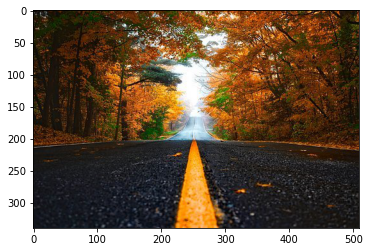

Fire 65.42514562606812


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [6]:
img = Image.open('/content/drive/MyDrive/Check_file/non_fire.250.jpg')
plt.imshow(img)
plt.show()

prediction, prob = plot_the_model.predict_model(img, "/content/drive/MyDrive/model_final.pth")
print(prediction, prob)

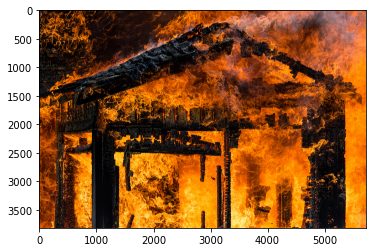

No_fire 80.16115427017212


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [7]:
img = Image.open('/content/drive/MyDrive/Check_file/fire.764.jpg')
plt.imshow(img)
plt.show()

prediction, prob = plot_the_model.predict_model(img, "/content/drive/MyDrive/model_final.pth")
print(prediction, prob)

In [6]:
model =resnet50_tunned.initialize_model_2(2, True, use_pretrained=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

use_cuda = torch.cuda.is_available()
if use_cuda:
    model = model.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [7]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# Number of epochs
n_epochs = 100

#loader = dataset(training_set, validation_set, 64, 0, transform=transform)
model2 = resnet50_tunned.train(n_epochs, loader, model, optimizer, criterion, use_cuda, "/content/drive/MyDrive/model_train_1.pth")

Epoch: 1 	Training Acc: 0.611956 	Training Loss: 0.000731 	Validation Acc: 0.613636 	Validation Loss: 0.002133
Validation loss decreased (inf --> 0.002133).  Saving model ...
Epoch: 2 	Training Acc: 0.617391 	Training Loss: 0.000701 	Validation Acc: 0.613636 	Validation Loss: 0.002046
Validation loss decreased (0.002133 --> 0.002046).  Saving model ...
Epoch: 3 	Training Acc: 0.615217 	Training Loss: 0.000680 	Validation Acc: 0.613636 	Validation Loss: 0.001987
Validation loss decreased (0.002046 --> 0.001987).  Saving model ...
Epoch: 4 	Training Acc: 0.621739 	Training Loss: 0.000659 	Validation Acc: 0.626623 	Validation Loss: 0.001934
Validation loss decreased (0.001987 --> 0.001934).  Saving model ...
Epoch: 5 	Training Acc: 0.645652 	Training Loss: 0.000643 	Validation Acc: 0.659091 	Validation Loss: 0.001875
Validation loss decreased (0.001934 --> 0.001875).  Saving model ...
Epoch: 6 	Training Acc: 0.685870 	Training Loss: 0.000632 	Validation Acc: 0.730519 	Validation Loss: 0.0

In [ ]:
# Saving the values 
torch.save(model2, '/content/drive/MyDrive/model_final_1.pth')

In [15]:
print("[INFO] loading model...")
model = torch.load('/content/drive/MyDrive/model_final_1.pth')

[INFO] loading model...


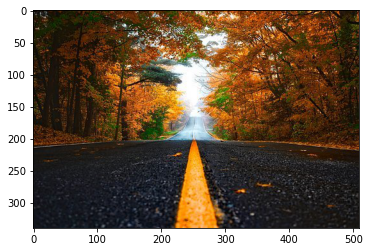

No_fire 50.869786739349365


In [6]:
img = Image.open('/content/drive/MyDrive/Check_file/non_fire.250.jpg')
plt.imshow(img)
plt.show()

prediction, prob = plot_the_model.predict_model(img, "/content/drive/MyDrive/model_final_1.pth")
print(prediction, prob)

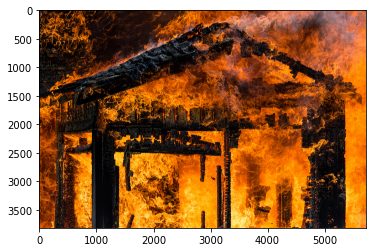

Fire 98.9364504814148


In [7]:
img = Image.open('/content/drive/MyDrive/Check_file/fire.764.jpg')
plt.imshow(img)
plt.show()

prediction, prob = plot_the_model.predict_model(img, "/content/drive/MyDrive/model_final_1.pth")
print(prediction, prob)